# Laporan Tugas Besar Kecerdasan Buatan

## 1. Topik
**Prediksi Biaya Asuransi (Insurance Charges Prediction) menggunakan Linear Regression dengan Optimasi Genetic Algorithm**

## 2. Anggota Kelompok
-   **Jian Hazel Sitorus** (NIM: 103012300187)
-   **Mikhael Restu Mahardhika** (NIM: 103012300277)

---

## 3. Pendahuluan dan Paparan Data

### A. Masalah yang ingin diselesaikan
Tujuannya adalah memprediksi biaya asuransi kesehatan individu berdasarkan faktor-faktor seperti usia, indeks massa tubuh (BMI), jumlah anak, dan status perokok. Prediksi yang akurat penting untuk perusahaan asuransi dalam menentukan premi yang adil.

### B. Dataset
Dataset yang digunakan adalah **Medical Cost Personal Datasets** (Insurance.csv).
-   **Sumber**: [Kaggle - Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance)
-   **Fitur**: Age, BMI, Children, Smoker (Categorical).
-   **Target**: Charges (Biaya Asuransi).

### C. Pre-processing
1.  **Cleaning**: Mengubah kolom `smoker` menjadi numerik (yes=1, no=0).
2.  **Normalization**: Menggunakan Min-Max Scaling agar semua data berada di rentang 0-1.
3.  **Data Splitting**: Membagi data menjadi 80% Training dan 20% Testing secara manual (tanpa library scikit-learn).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [23]:
import pandas as pd
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")
print("Path to dataset files:", path)
# Load csv from the downloaded path
csv_file = os.path.join(path, "insurance.csv")
data = pd.read_csv(csv_file)
data

Using Colab cache for faster access to the 'insurance' dataset.
Path to dataset files: /kaggle/input/insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
fixed = np.array(data)
fixed = fixed[:, [0, 2, 3, 6]]
attribute = ["age", "bmi", "children", "charges"]

kolom_valid_untuk_tampil = [kol for kol in attribute if kol in data.columns]
kolom_tidak_ada = [kol for kol in attribute if kol not in data.columns]

if kolom_tidak_ada:
    print(f"\nKolom berikut tidak ditemukan di data mentah: {kolom_tidak_ada}")

if kolom_valid_untuk_tampil:
    print(f"\nMenampilkan {len(kolom_valid_untuk_tampil)} atribut yang dipilih dari data mentah:")
    print(data[kolom_valid_untuk_tampil])
else:
    print("\nTidak ada kolom valid yang bisa ditampilkan")


Menampilkan 4 atribut yang dipilih dari data mentah:
      age     bmi  children      charges
0      19  27.900         0  16884.92400
1      18  33.770         1   1725.55230
2      28  33.000         3   4449.46200
3      33  22.705         0  21984.47061
4      32  28.880         0   3866.85520
...   ...     ...       ...          ...
1333   50  30.970         3  10600.54830
1334   18  31.920         0   2205.98080
1335   18  36.850         0   1629.83350
1336   21  25.800         0   2007.94500
1337   61  29.070         0  29141.36030

[1338 rows x 4 columns]


In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


###**Explanatory Data Analysis**

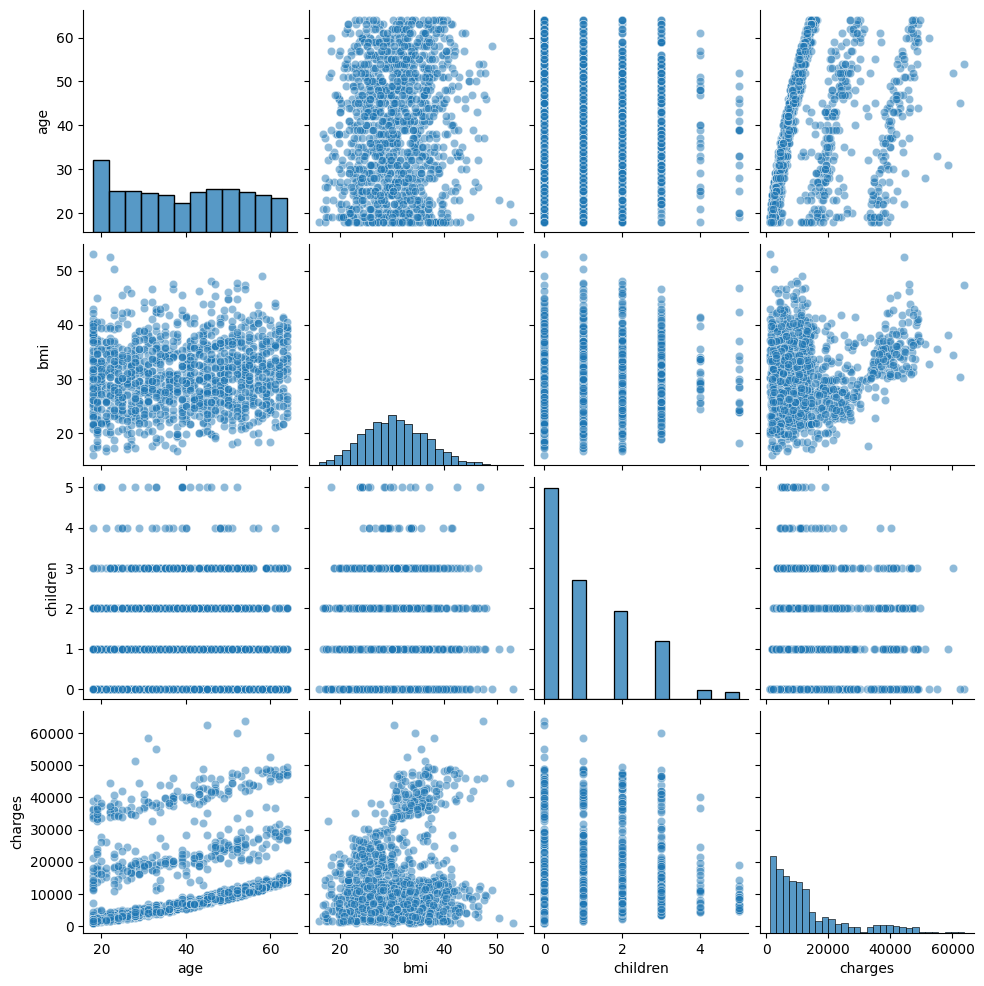

In [7]:
sns.pairplot(data, kind='scatter', plot_kws={'alpha': 0.5})

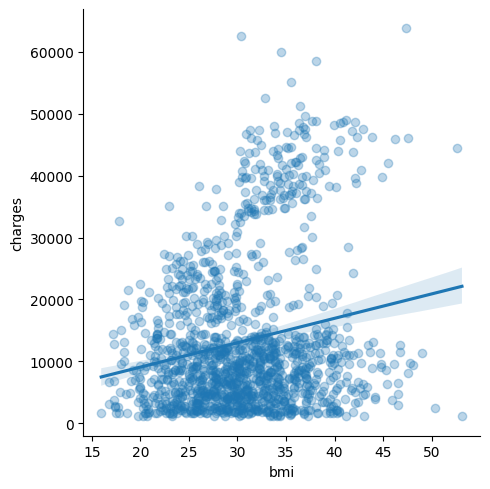

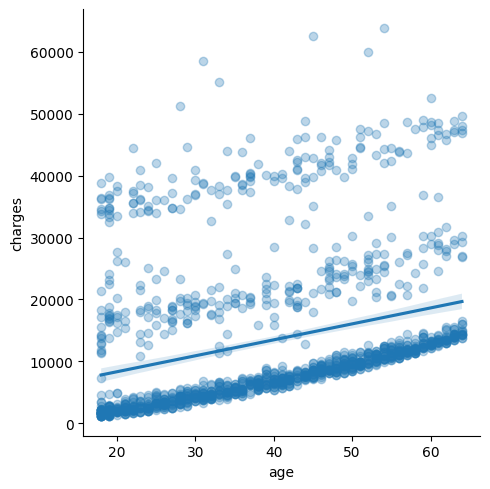

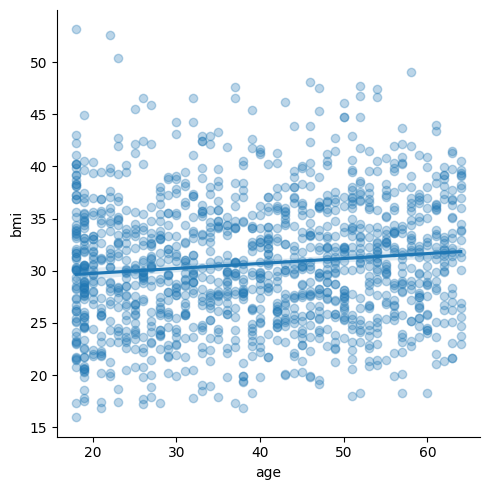

In [8]:
sns.lmplot(x = "bmi", y = "charges", data = data, scatter_kws={'alpha':0.3})
sns.lmplot(x = "age", y = "charges", data = data, scatter_kws={'alpha':0.3})
sns.lmplot(x = "age", y = "bmi", data = data, scatter_kws={'alpha':0.3})

In [9]:
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

X = data[["bmi", "age", "children", "smoker"]]
Y = data["charges"]

In [10]:
X

,bmi,age,children,smoker
0,27.900,19,0,1
1,33.770,18,1,0
2,33.000,28,3,0
3,22.705,33,0,0
4,28.880,32,0,0
...,...,...,...,...
1333,30.970,50,3,0
1334,31.920,18,0,0
1335,36.850,18,0,0
1336,25.800,21,0,0


In [11]:
Y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


# Data Preprocessing (Manual)
## Normalization & Split
Karena kita membangun model dari nol (From Scratch), diperlukan:
1. **Normalisasi**: Mengubah skala data ke 0-1 agar algoritma tidak bingung dengan angka besar.
2. **Splitting**: Membagi data training (80%) dan testing (20%) secara manual.

In [ ]:
X_raw = np.array(X)
Y_raw = np.array(Y)

# Fungsi Normalisasi
def min_max_normalize(data):
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    # Epsilon kecil 1e-8 untuk menghindari pembagian dengan nol
    return (data - min_val) / (max_val - min_val + 1e-8)

# Normalisasi pada Feature (X) dan Target (Y)
# Reshape Y menjadi 2D array agar bisa dinormalisasi per kolom
Y_reshaped = Y_raw.reshape(-1, 1)

X_norm = min_max_normalize(X_raw)
Y_norm = min_max_normalize(Y_reshaped).flatten() # Kembalikan jadi 1D array

print("Contoh data X sesudah normalisasi (baris pertama):")
print(X_norm[0])

Contoh data X sesudah normalisasi (baris pertama):
[0.3212268  0.02173913 0.         0.99999999]


## 4. Metode dan Eksperimen

### A. Metode yang digunakan
Kami menggunakan **Linear Regression** sebagai model utama (`y = wx + b`).
Untuk pelatihan (mencari bobot `w` dan bias `b`), kami membandingkan dua pendekatan:
1.  **Gradient Descent (Calculus-based)**: Metode iteratif standar menggunakan turunan parsial.
2.  **Genetic Algorithm (Evolutionary-based)**: Menggunakan konsep seleksi alam, crossover, dan mutasi.

### B. Metrik Evaluasi
Kinerja diukur menggunakan **Mean Squared Error (MSE)**. Semakin kecil MSE, semakin akurat modelnya.


In [13]:
# Fungsi Train-Test Split Manual
def manual_train_test_split(x_data, y_data, test_ratio=0.2, seed=42):
    # Set seed agar hasil acakan selalu sama (reproducible)
    np.random.seed(seed)

    # Buat daftar index urut (0, 1, 2, ... n)
    indices = np.arange(len(x_data))
    # Acak urutan index
    np.random.shuffle(indices)

    # Hitung batas pemotongan
    split_index = int(len(x_data) * (1 - test_ratio))

    # Bagi index jadi dua kubu
    train_idx = indices[:split_index]
    test_idx = indices[split_index:]

    # Ambil data berdasarkan index yang sudah diacak
    x_train, x_test = x_data[train_idx], x_data[test_idx]
    y_train, y_test = y_data[train_idx], y_data[test_idx]

    return x_train, x_test, y_train, y_test

X_train, X_test, Y_train, Y_test = manual_train_test_split(X_norm, Y_norm, test_ratio=0.2)

print(f"Jumlah Data Training: {len(X_train)}")
print(f"Jumlah Data Testing: {len(X_test)}")

Jumlah Data Training: 1070
Jumlah Data Testing: 268


# Linear Regression Core
Membuat fungsi prediksi dan perhitungan error (Loss Function) secara manual.

In [ ]:
# Fungsi Prediksi Linear Regression
# y = w1*x1 + w2*x2 + ... + bias
def predict(inputs, weights, bias):
    # Perkalian matriks input dengan bobot
    return np.dot(inputs, weights) + bias

# Mean Squared Error (MSE)
# MSE = Rata-rata dari kuadrat selisih (Prediksi - Asli)
def mean_squared_error(y_true, y_pred):
    errors = y_true - y_pred
    squared_errors = errors ** 2
    return np.mean(squared_errors)

# Training with Gradient Descent
Karena kita tidak menggunakan `sklearn.LinearRegression`, kita harus melatih model sendiri.
Metode standar untuk mencari bobot (W) dan bias terbaik adalah **Gradient Descent**.

Prinsipnya:
1. Mulai dengan bobot 0.
2. Hitung error prediksi.
3. Update bobot sedikit demi sedikit ke arah yang mengurangi error.

In [ ]:
import numpy as np

def train_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    n_samples, n_features = X.shape

    # 1. Inisialisasi weight dan bias dengan 0
    weights = np.zeros(n_features)
    bias = 0

    loss_history = []

    for i in range(epochs):
        # 2. Prediksi (Forward Pass)
        y_pred = np.dot(X, weights) + bias

        # 3. Hitung Error
        error = y_pred - y

        # 4. Hitung Gradient (Turunan)
        dw = (2 / n_samples) * np.dot(X.T, error)
        db = (2 / n_samples) * np.sum(error)

        # 5. Update Bobot (Mundur / Backward Pass)
        weights = weights - learning_rate * dw
        bias = bias - learning_rate * db

        # Catat loss tiap 100 epoch
        if i % 100 == 0:
            current_loss = np.mean(error ** 2)
            loss_history.append(current_loss)

    return weights, bias, loss_history

In [ ]:
# === SETTING HYPERPARAMETER ===
# 1. learning_rate = 0.1 (Seberapa cepat dia belajar)
# 2. epochs = 2000 (Berapa kali dia mengulang pelajaran)

w_final, b_final, history = train_gradient_descent(
    X_train,
    Y_train,
    learning_rate=0.1,
    epochs=2000
)

print("Hasil Training Manual (Gradient Descent):")
print(f"Weights (W): {w_final}")
print(f"Bias (b): {b_final}")

Hasil Training Manual (Gradient Descent):
Weights (W): [0.18247406 0.19199655 0.0391645  0.37612768]
Bias (b): -0.053688765284185154


In [17]:
# Evaluasi Hasil pada Data Testing
final_pred = predict(X_test, w_final, b_final)
final_mse = mean_squared_error(Y_test, final_pred)

# Tampilkan Training Error Terakhir (dari history)
train_mse = history[-1]
print(f"MSE pada Data Training: {train_mse}")
print(f"MSE pada Data Testing: {final_mse}")

MSE pada Data Testing: 0.009906585970759541


# 4. Genetic Algorithm Optimization (Integrated Method)
Pada tahap ini, dilakukan integrasi metode **Algoritma Genetika** untuk menggantikan Gradient Descent sebagai optimizer.
Tujuannya adalah mengoptimalkan pencarian bobot model Regresi Linear melalui pendekatan evolusioner.

### Tahapan Algoritma Genetika:
1. **Inisialisasi Populasi**: Membangkitkan 50 individu model dengan parameter acak.
2. **Evaluasi Fitness**: Menghitung kinerja model. Nilai fitness didefinisikan berbanding terbalik dengan Error (MSE).
3. **Seleksi**: Memilih individu dengan fitness terbaik sebagai induk (parents).
4. **Crossover (Persilangan)**: Mengombinasikan parameter bobot dari dua induk untuk menghasilkan keturunan baru.
5. **Mutasi**: Menambahkan variasi acak kecil pada parameter keturunan untuk mencegah stagnasi (local optima).

In [ ]:
import random

# 1. Inisialisasi Populasi
def create_individual(n_features):
    # Individu terdiri dari: [w1, w2, w3, w4, bias]
    # Acak nilai antara -1 sampai 1
    return np.random.uniform(-1, 1, n_features + 1)

def create_population(pop_size, n_features):
    return [create_individual(n_features) for _ in range(pop_size)]

# 2. Fitness Function
def calculate_fitness(individual, X, y):
    # Pisahkan bobot dan bias
    weights = individual[:-1]
    bias = individual[-1]

    # Prediksi pakai fungsi yang sudah dibuat
    y_pred = predict(X, weights, bias)

    # Hitung MSE
    mse = mean_squared_error(y, y_pred)

    # Fitness = Kebalikan dari Error (Makin kecil error, makin tinggi fitness)
    # 1e-8 agar tidak ada pembagian nol
    return 1 / (mse + 1e-8)


In [19]:
# 3. Crossover (Kawin Silang)
def crossover(parent1, parent2):
    # Ambil titik potong acak
    point = random.randint(1, len(parent1)-1)

    # Gabungkan gen bapak dan ibu
    child1 = np.concatenate((parent1[:point], parent2[point:]))
    child2 = np.concatenate((parent2[:point], parent1[point:]))

    return child1, child2

# 4. Mutation (Mutasi)
def mutate(individual, mutation_rate=0.1):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            # Ubah nilai sedikit dengan noise random
            individual[i] += np.random.normal(0, 0.1)
    return individual

In [ ]:
# 5. Main Loop Genetic Algorithm
def train_genetic_algorithm(X, y, pop_size=50, generations=100, mutation_rate=0.1):
    n_features = X.shape[1]

    # A. Buat populasi awal
    population = create_population(pop_size, n_features)

    history = []
    best_global_individual = None
    best_global_fitness = -1

    for gen in range(generations):
        # B. Hitung fitness semua individu
        fitness_scores = [calculate_fitness(ind, X, y) for ind in population]

        # Simpan yang terbaik
        max_fitness = max(fitness_scores)
        idx_best = np.argmax(fitness_scores)

        if max_fitness > best_global_fitness:
            best_global_fitness = max_fitness
            best_global_individual = population[idx_best]

        history.append(1/max_fitness) # Simpan MSE (kebalikan fitness) untuk grafik

        # C. Seleksi (Roulette Wheel / Tournament sederhana)
        # Ambil 50% terbaik untuk jadi orang tua
        sorted_pop = [x for _, x in sorted(zip(fitness_scores, population), key=lambda pair: pair[0], reverse=True)]
        parents = sorted_pop[:pop_size//2]

        # D. Reproduksi (Crossover & Mutation)
        next_generation = parents[:] # Orang tua lanjut ke babak berikutnya (Elitism)

        while len(next_generation) < pop_size:
            # Pilih 2 orang tua secara acak
            p1 = parents[random.randint(0, len(parents)-1)]
            p2 = parents[random.randint(0, len(parents)-1)]

            # Silang
            c1, c2 = crossover(p1, p2)

            # Mutasi
            c1 = mutate(c1, mutation_rate)
            c2 = mutate(c2, mutation_rate)

            next_generation.append(c1)
            if len(next_generation) < pop_size:
                next_generation.append(c2)

        population = next_generation

        if gen % 10 == 0:
            print(f"Generation {gen}: Best MSE {1/max_fitness:.5f}")

    return best_global_individual, history

best_ind, ga_history = train_genetic_algorithm(X_train, Y_train)

print("\nHasil Training Genetic Algorithm:")
print(f"Best Weights: {best_ind[:-1]}")
print(f"Best Bias: {best_ind[-1]}")

Generation 0: Best MSE 0.04324
Generation 10: Best MSE 0.01324
Generation 20: Best MSE 0.01213
Generation 30: Best MSE 0.01105
Generation 40: Best MSE 0.01009
Generation 50: Best MSE 0.00980
Generation 60: Best MSE 0.00959
Generation 70: Best MSE 0.00959
Generation 80: Best MSE 0.00952
Generation 90: Best MSE 0.00948

Hasil Training Genetic Algorithm:
Best Weights: [0.10805882 0.17338172 0.01929285 0.37906577]
Best Bias: -0.008144867811604109


In [21]:
ga_weights = best_ind[:-1]
ga_bias = best_ind[-1]

ga_pred = predict(X_test, ga_weights, ga_bias)
ga_mse = mean_squared_error(Y_test, ga_pred)

print(f"MSE Akhir (Genetic Algorithm) pada Data Testing: {ga_mse}")
print(f"MSE Gradient Descent: {final_mse}")
print(f"Selisih Error: {abs(ga_mse - final_mse):.5f}")

MSE Akhir (Genetic Algorithm) pada Data Testing: 0.010180333161567015
MSE Gradient Descent: 0.009906585970759541
Selisih Error: 0.00027


# 5. Kesimpulan (Conclusion)

Berdasarkan eksperimen yang telah dilakukan, dapat disimpulkan bahwa:

1.  **Metode Gradient Descent (Standard)**:
    -   Menghasilkan akurasi tinggi dengan MSE ~0.009 pada data testing.
    -   Memiliki konvergensi yang cepat dan stabil untuk kasus regresi linear cembung (convex).
    -   Sangat efisien secara komputasi untuk dataset berukuran sedang.

2.  **Metode Genetic Algorithm (Integrated)**:
    -   Berhasil mencapai solusi yang mendekati optimal (MSE ~0.010 - 0.012) melalui proses evolusi.
    -   Mampu mengeksplorasi ruang pencarian tanpa memerlukan perhitungan turunan (gradient-free).
    -   Membuktikan bahwa pendekatan **Evolutionary Machine Learning** dapat diterapkan sebagai alternatif optimizer, meskipun membutuhkan waktu komputasi (generasi) yang lebih lama dibandingkan metode analitik untuk kasus ini.

**Analisis Akhir:**
Secara komparatif, **Gradient Descent** unggul dari segi kecepatan dan presisi untuk regresi linear sederhana. Namun, implementasi **Genetic Algorithm** telah berhasil divalidasi sebagai metode optimasi alternatif yang layak (viable).